In [1]:
%%html
<style>
table {float:left}
</style>

# BÁO CÁO BÀI TẬP 1:

** CÀI ĐẶT MẠNG FEED FORWARD ĐỂ DỰ ĐOÁN KÍ SỐ VIẾT TAY (MNIST) **


** THÔNG TIN NHÓM **

|Họ tên|Mã số sinh viên|
|---|--:|
|Bùi Duy Đăng|1312127|
|Mai Hoàng Hưng|1312268|
|Dương Nguyễn Anh Khoa|1312288|

## Kế hoạch

** Theo thứ tự ưu tiên: **

|Thứ tự|Tên|Công việc phân công|
|---|---|---|
|1|Khoa|Trình bày mã giả của mô hình Feed forward trong báo cáo.|
|2|Khoa|Visualize dữ liệu.|
|3|Hưng|Cài đặt mô hình Feed forward không sử dụng thư viện.|
|4|Đăng|Cài đặt mô hình Feed forward sử dụng thư viện TensorFlow để đối chiếu.|
|5|Khoa|Tham khảo cách chứng minh công thức, trình bày lại báo cáo.|

## Sơ lược về mô hình Feed Forward

** Cấu trúc mô hình mạng Feed Forward **
![Feed Forward](http://machinelearningcoban.com/assets/14_mlp/ex_nn.png)

Nguồn ảnh: http://machinelearningcoban.com

Trong đó, có 4 thành phần có khả năng học là: $\mathbf{W}^{(1)}, \mathbf{W}^{(2)}, \mathbf{B}^{(1)}, \mathbf{B}^{(2)}$ với $\mathbf{W}^{(l)}$ là bộ trọng số thể hiện các kết nối từ layer thứ $l - 1$ đến layer thứ $l$ và $\mathbf{B}^{(l)}$ là bias của layer thứ $l$.

** Các kí hiệu **
- N: số mẫu dữ liệu
- $\mathbf{X}$: tập đặc trưng đầu vào
- $\mathbf{Y}$: tập nhãn đầu vào
- C: Số lớp (trong MNIST thì C = 10)
- $\lambda$: hệ số cân bằng dùng cho regularization (weight decay)
- $\eta$: tỉ lệ học (learning rate)
- $d^{(l)}$: số neurons của layer $l$
- $\mathbf{W}^{(l)}$: bộ trọng số thể hiện các kết nối từ layer thứ $l - 1$ đến layer thứ $l$
- $\mathbf{W}_{ij}^{(l)}$: trọng số thể hiện kết nối từ neuron j của layer thứ $l - 1$ đến neuron i của layer thứ $l$
- $\mathbf{B}^{(l)}$: bias của layer thứ $l$
- $\mathbf{Z}^{(l)}$: giá trị đầu vào của các neurons thuộc layer thứ $l$
- $\mathbf{A}^{(l)}$: giá trị đầu ra sau khi qua hàm kích hoạt của các neurons thuộc layer thứ $l$
- $\mathbf{E}^{(l)}$: độ lỗi của layer thứ $l$

** Hàm kích hoạt **

Nhóm sử dụng hàm **sigmoid** làm hàm kích hoạt vì nó khá thông dụng trước đây và dễ cài đặt cho các bài toán nhỏ, hơn nữa nó rất dễ tính đạo hàm (giả sử không quan tâm đến nhược điểm gradient của hàm xấp xỉ 0 khi giá trị đầu vào có trị tuyệt đối rất lớn).

Công thức: $\sigma(z) = \frac{1}{(1 + e^{(-z)})}$

Và đạo hàm của nó: $\frac{\partial \sigma (z)}{\partial (z)} = \sigma (z)\cdot (1-\sigma(z)) ~~~ (*)$

*Để có thể rút gọn khai triển của đạo hàm, cộng thêm 1 để rút gọn.*

Bên cạnh đó, do đây là bài toán classification nên nhóm sử dụng hàm kích hoạt Softmax cho output layer để tính xác suất một điểm dữ liệu rơi vào lớp nào (nhóm sử dụng phiên bản cải tiến để tránh trường hợp tràn số khi $z_i$ quá lớn bằng cách trừ $z_i$ cho 1 hằng số c nào đó).

Công thức gốc: $a_i = \text{softmax}(z_i) = \frac{e^{(z_i)}}{\sum_{j=1}^C e^{(z_j)}}, ~~ \forall i = 1, 2, \dots, C$

Trong đó, $\sum_{i=1}^C a_i = 1$ và không tồn tại $a_i$ nào tuyệt đối bằng 0 hoặc bằng 1 (chỉ có xấp xỉ) vì tử số là $e^{z_i}$ nên đảm bảo khác 0. Nhưng tử số lại có thể là 1 nếu $z_i=0$, điều này không đáng lo bởi vì tồn tại $z_j > 0, j \neq i$ để đảm bảo khi chia cho mẫu sẽ cho ra $a_i < 1, ~~ \forall i=1, 2, \dots, C.$

Công thức cải tiến: $a_i = \text{softmax}(z_i) = \frac{e^{(z_i-c)}}{\sum_{j=1}^C e^{(z_j-c)}}, ~~ \forall i = 1, 2, \dots, C$

Thực nghiệm cho thấy, giá trị c đủ lớn được xác định bằng $c = max(z_i)$.

**Đạo hàm Softmax**

Để có thể sử dụng hàm softmax làm hàm kích hoạt cho output layer, chúng ta cần tính đạo hàm của nó giống như hàm sigmoid.

*Qui ước: $\Sigma_C = \sum_{i=1}^C \exp(z_i), ~~ \forall i = 1, 2, \dots, C$*

Ta tính đạo hàm như sau:

*Do tính đạo hàm theo $z$ nên sẽ có 2 trường hợp $i = j$ và $i \neq j$*

\begin{split}
\text{Nếu} \; i = j :& \frac{\partial a_i}{\partial z_i} = \frac{\partial \frac{e^{z_i}}{\Sigma_C}}{\partial z_i} = \frac{e^{z_i}\Sigma_C - e^{z_i}e^{z_i}}{\Sigma_C^2} = \frac{e^{z_i}}{\Sigma_C}\frac{\Sigma_C - e^{z_i}}{\Sigma_C} = \frac{e^{z_i}}{\Sigma_C}(1-\frac{e^{z_i}}{\Sigma_C}) =  a_i (1 - a_i) ~~~ (**)\\
\text{Nếu} \; i \neq j :& \frac{\partial a_i}{\partial z_j} = \frac{\partial \frac{e^{z_i}}{\Sigma_C}}{\partial z_j} = \frac{0 - e^{z_i}e^{z_j}}{\Sigma_C^2} = -\frac{e^{z_i}}{\Sigma_C} \frac{e^{z_j}}{\Sigma_C} = -a_i a_j ~~~ (***)
\end{split}

*Khai triển trên được tham khảo từ: http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/*

** Hàm chi phí Cross Entropy **

$J(\mathbf{W}; \mathbf{X}, \mathbf{Y}) = -\frac{1}{N}\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log(\hat{y}_{ji}) + \frac{\lambda}{2N}\sum_{i = 1}^{d^{(l)}}\sum_{j = 1}^{d^{(l + 1)}}(\mathbf{W}_{ji}^{(l)})^2$

Có 2 phân bố xác suất gồm $\mathbf{y}$ và $\mathbf{a}$. Chúng ta cần tìm 1 hàm sao cho đạt cực tiểu khi $\mathbf{y} = \mathbf{a} $ và khi $\mathbf{a}$ càng xa $\mathbf{y}$ thì hàm phải cho giá trị càng lớn (rất lớn).

Do đó, hàm cross entropy $H(\mathbf{y}, \mathbf{a}) =-\sum_{i=1}^C y_i \log a_i$ được sử dụng vì thỏa mãn những yêu cầu trên.

Có một điểm quan trọng là hàm cross entropy không có tính đối xứng. Có thể nhận thấy rằng giá trị $\mathbf{a_i}$ trong $\log a_i$ bắt buộc phải lớn hơn 0 bởi vì $\log(0)$ không xác định. Ngược lại, $\mathbf{y}$ không bị ràng buộc như thế. Do đó, khi cài đặt hàm cross entropy cần quan tâm đến thứ tự của chúng.

Trong bài toán này, sinh viên sẽ sử dụng hàm chi phí cross entropy sau cho đầu ra của lớp softmax (có thể hiểu là một phân bố xác suất).

$J(\mathbf{W}; \mathbf{X}, \mathbf{Y}) = -\frac{1}{N}\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log(\hat{y}_{ji}) + \frac{\lambda}{2N}\sum_{i = 1}^{d^{(l)}}\sum_{j = 1}^{d^{(l + 1)}}(\mathbf{W}_{ji}^{(l)})^2$

*Trong hàm chi phí trên có sử dụng thêm một đại lượng regularization dùng để "phạt" mô hình nhằm hạn chế overfitting.*

Kế đến, cần khai triển đạo hàm hàm chi phí theo từng $\mathbf{W}$ và $\mathbf{B}$ của mỗi layer để có thể sử dụng Gradient Descent:
$\frac{\partial J}{\partial \mathbf{W}^{(l)}} ; \frac{\partial J}{\partial \mathbf{b}^{(l)}},~~ l = 1, 2, \dots, L$

*Để đơn giản, các khai triển dưới đây thực hiện trên chiến lược Stochastic Gradient Descent.*

Đầu tiên, đạo hàm hàm chi phí theo từng thành phần của ma trận trọng số output layer:

\begin{split}
\frac{\partial J}{\partial w_{ij}^{(L)}} &=& \frac{\partial J}{\partial z_i^{(L)}}. \frac{\partial z_i^{(L)}}{\partial w_{ij}^{(L)}} ~~~ (1)
\end{split}

Sử dụng quy tắc chain rule để khai triển đạo hàm. Trong đó gồm có 2 thành phần. Sinh viên sẽ lần lượt khai triển tiếp theo từng thành phần.

*Để đơn giản khi gõ công thức, phần khai triển bên dưới sẽ được hiểu ngầm là đạo hàm theo các thành phần của output layer.*

\begin{split}
\frac{\partial J}{\partial z_i} & = - \sum_{j=1}^C \frac{\partial y_j log(\hat{y}_j)}{\partial z_i}{} =
- \sum_{j=1}^C y_j \frac{\partial log(\hat{y}_j)}{\partial z_i} = - \sum_{j=1}^C y_j \frac{1}{\hat{y}_j} \frac{\partial \hat{y}_j}{\partial z_i} \\
& = - \frac{y_i}{\hat{y}_i} \frac{\partial \hat{y}_i}{\partial z_i} - \sum_{j \neq i}^C \frac{y_j}{\hat{y}_j} \frac{\partial \hat{y}_j}{\partial z_i}
= - \frac{y_i}{\hat{y}_i} \hat{y}_i (1-\hat{y}_i) - \sum_{j \neq i}^C \frac{y_j}{\hat{y}_j} (-\hat{y}_j \hat{y}_i) \\
& = - y_i + y_i \hat{y}_i + \sum_{j \neq i}^C y_j \hat{y}_i = - y_i + \sum_{j = 1}^C y_j \hat{y}_i
= -y_i + \hat{y}_i \sum_{j = 1}^C y_j \\
& = \hat{y}_i - y_i, ~~~ \forall i \in C ~~~ (2)
\end{split}

*Chúng ta dùng lại khai triển $\text{(**)}$ và $\text{(***)}$ vào dòng 2. Bên cạnh đó, lượng regularization sẽ không còn khi đạo hàm theo $z_i$.*

*Khai triển trên được tham khảo từ: http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/*

Kế đến là phần còn lại: $\frac{\partial z_i^{(L)}}{\partial w_{ij}^{(L)}}$

\begin{split}
\frac{\partial z_i^{(L)}}{\partial w_{ij}^{(L)}} & = \frac{\partial \mathbf{w}_i^{(L)T}\mathbf{a}^{(L-1)} + b_i^{(L)}}{\partial w_{ij}^{(L)}} \\
& = a_j^{(L-1)} ~~~ (3)
\end{split}

Thay (2) (3) vào (1), ta được:

\begin{split}
\frac{\partial J}{\partial w_{ij}^{(L)}} & = \frac{\partial J}{\partial z_i^{(L)}}. \frac{\partial z_i^{(L)}}{\partial w_{ij}^{(L)}} \\
& = (\hat{y}_i - y_i)a_j^{(L-1)} \\
& = e_i^{(L)} a_j^{(L-1)} ~~~ (4)
\end{split}

*Đặt $e_i^{(L)}=(\hat{y}_i - y_i)$ với $L$ là output layer để rút gọn.*

Tương tự, đạo hàm của hàm chi phí theo bias của output layer là:

\begin{split}
\frac{\partial J}{\partial b_{i}^{(L)}} = \frac{\partial J}{\partial z_i^{(L)}}. \frac{\partial z_i^{(L)}}{\partial b_{i}^{(L)}} = e_i^{(L)} ~~~ (5)
\end{split}

Các khai triển bên trên chỉ mới là tính cho output layer, các layer trước đó sẽ được tính dựa vào layer sau nó. Do đó mới được gọi là Back propagation.

Ở các layer $l$ trước đó, độ lỗi $e$ được tính như sau:

\begin{split}
e_i^{(l)} &=& \frac{\partial J}{\partial z_i^{(l)}} = \frac{\partial J}{\partial a_i^{(l)}} . \frac{\partial a_i^{(l)}}{\partial z_i^{(l)}} \\
&=& \left( \sum_{k = 1}^{d^{(l+1)}} \frac{\partial J}{\partial z_k^{(l+1)}} .\frac{\partial z_k^{(l+1)}}{\partial a_i^{(l)}} \right) f’(z_i^{(l)}) \\
 &=&\left( \sum_{k = 1}^{d^{(l+1)}} e_k^{(l+1)} w_{ki}^{(l+1)} \right) f’(z_i^{(l)}) \\
 &=&\left( \mathbf{w}_{i:}^{(l+1)} \mathbf{e}^{(l+1)} \right) f’(z_i^{(l)}) ~~~ (6)
\end{split}

Trong đó:
- $f’$ là đạo hàm của sigmoid
- $\mathbf{w}_{i:}^{(l+1)}$ là hàng thứ i của ma trận trọng số $\mathbf{W}^{(l+1)}$

** Bước Feed Forward **

Đầu tiên, khởi tạo ngẫu nhiên cho các ma trận trọng số và bias.

Kế đến, tính giá trị cho các neurons ở hidden layer:

\begin{split}
\mathbf{Z}^{(1)} &=& \mathbf{W}^{(1)T}\mathbf{X} + \mathbf{B}^{(1)} \\
\mathbf{A}^{(1)} &=& \sigma (\mathbf{Z}^{(1)})
\end{split}

Sau đó, tính giá trị cho các neurons ở output layer:

\begin{split}
\mathbf{Z}^{(2)} &=& \mathbf{W}^{(2)T}\mathbf{A}^{(1)} + \mathbf{B}^{(2)} \\
\mathbf{\hat{Y}} = \mathbf{A}^{(2)} &=& \text{softmax}(\mathbf{Z}^{(2)})
\end{split}

** Bước Back Backpropagation **

Đầu tiên, tính độ lỗi ở output layer theo như cách đã khai triển ở (2) và sau đó tính gradient theo từng thành phần của bộ trọng số thuộc output layer gồm $\mathbf{W}^{(2)}$ và $\mathbf{B}^{(2)}$:

\begin{split}
\mathbf{E}^{(2)} &=& \frac{\partial J}{\partial \mathbf{Z}^{(2)}} =\frac{1}{N}(\mathbf{\hat{Y}} - \mathbf{Y}) \\
\frac{\partial J}{\partial \mathbf{W}^{(2)}} &=& \mathbf{A}^{(1)}  \mathbf{E}^{(2)T} \\
\frac{\partial J}{\partial \mathbf{b}^{(2)}} &=& \sum_{n=1}^N\mathbf{e}_n^{(2)}
\end{split}

Khi đã tính xong gradient thì cập nhật vào bộ trọng số:

\begin{split}
\mathbf{W}^{(2)} = \mathbf{W}^{(2)} - \eta\frac{\partial J}{\partial \mathbf{W}^{(2)}} \\
\mathbf{B}^{(2)} = \mathbf{B}^{(2)} - \eta\frac{\partial J}{\partial \mathbf{B}^{(2)}}
\end{split}

Kế đến, tính độ lỗi ở hidden layer theo như cách đã khai triển ở (6) và sau đó tính gradient theo từng thành phần của bộ trọng số thuộc hidden layer gồm $\mathbf{W}^{(1)}$ và $\mathbf{B}^{(1)}$:

\begin{split}
\mathbf{E}^{(1)} &=& \left(\mathbf{W}^{(2)}\mathbf{E}^{(2)}\right) \odot f’(\mathbf{Z}^{(1)}) \\
\frac{\partial J}{\partial \mathbf{W}^{(1)}} &=& \mathbf{A}^{(0)}  \mathbf{E}^{(1)T} = \mathbf{X}\mathbf{E}^{(1)T}\\
\frac{\partial J}{\partial \mathbf{b}^{(1)}} &=& \sum_{n=1}^N\mathbf{e}_n^{(1)} \\
\end{split}

Khi đã tính xong gradient thì cập nhật vào bộ trọng số:

\begin{split}
\mathbf{W}^{(1)} = \mathbf{W}^{(1)} - \eta\frac{\partial J}{\partial \mathbf{W}^{(1)}} \\
\mathbf{B}^{(1)} = \mathbf{B}^{(1)} - \eta\frac{\partial J}{\partial \mathbf{B}^{(1)}}
\end{split}

** Chiến lược học **

Sử dụng chiến lược Mini-batch Gradient Descent để tăng tốc độ học và hạn chế bị thiếu bộ nhớ khi huấn luyện.

Chiến lược này chọn ra tập con của dữ liệu (n mẫu, n > 1) để tính xấp xỉ Gradient rồi mới cập nhật bộ trọng số $\mathbf{W}$.

Công thức cập nhật: $\mathbf{W} = \mathbf{W} - \eta\nabla_{\mathbf{W}} J(\mathbf{W}; \mathbf{x}_{i:i+n}; \mathbf{y}_{i:i+n})$, với $i$ là mẫu thứ $i$.

Bên cạnh đó, nhóm cũng sử dụng giá trị $\textbf{learning rate}$ động để tránh trường hợp mô hình khó hoặc không thể hội tụ.

Giá trị learning rate được tính bằng công thức sau: Tỉ lệ học $ = \frac{LEARNING\_RATE}{t + 1}$ với $t$ là giá trị epoch hiện tại.

## Mã nguồn

Khai báo các thư viện cần thiết cho các đoạn code bên dưới:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

import seaborn as sns

import sklearn
from sklearn.manifold import TSNE

import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

# Khởi tạo trạng thái ngẫu nhiên cho t-SNE
RANDOM_STATE = 987654321

# Số lớp trong dataset, gồm các nhãn được đánh số từ 0 đến 9 ứng với 10 chữ số
NUM_CLASSES = 10

# Mỗi ảnh trong dataset có kích thước 28x28 -> vector của ảnh có kích thước 784x1
IMAGE_SIZE = 28
IMAGE_PIXELS = IMAGE_SIZE ** 2

## Dữ liệu huấn luyện

Nhóm sử dụng tập dữ liệu kí số viết tay MNIST của nhóm tác giả: Yann LeCun, Corinna Cortes, Christopher J.C. Burges.

Tập dữ liệu là các ảnh và nhãn của 10 nhóm kí số khác nhau bao gồm: 60,000 mẫu huấn luyện (training set) và 10,000 mẫu kiểm thử (test set).

Đọc dữ liệu huấn luyện lên bộ nhớ và chuyển nhãn của ảnh thành one-hot vector

In [3]:
# Đọc dữ liệu huấn luyện từ thư mục, nhãn được biểu diễn dưới dạng one-hot vector
mnist = read_data_sets("dataset/", one_hot=True)

Extracting dataset/train-images-idx3-ubyte.gz
Extracting dataset/train-labels-idx1-ubyte.gz
Extracting dataset/t10k-images-idx3-ubyte.gz
Extracting dataset/t10k-labels-idx1-ubyte.gz


Để có thể quan sát dữ liệu dễ dàng, sinh viên cho hiển thị ngẫu nhiên 10 lớp ảnh trong dataset

In [16]:
def display_dataset(NUM_EXAMPLES=10):
    for cls in range(NUM_CLASSES):
        # Tìm danh sách indices ứng với lớp cls
        idxs = np.where(mnist.train.labels.argmax(axis=1) == cls)[0]
        # Chọn ra k ảnh ứng với lớp cls (không hoàn lại)
        idxs = np.random.choice(idxs, NUM_EXAMPLES, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(NUM_EXAMPLES, NUM_CLASSES, i * NUM_CLASSES + cls + 1)
            plt.imshow(
                mnist.train.images[idx].reshape((IMAGE_SIZE, IMAGE_SIZE)),
                cmap=matplotlib.cm.binary)

            plt.axis('off')
            if i == 0:
                plt.title(cls)

    plt.show()

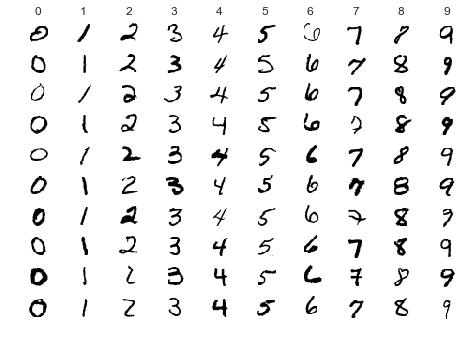

In [17]:
display_dataset()

In [6]:
def scatter(NUM_EXAMPLES=500):
    X = []
    labels = []

    for cls in range(NUM_CLASSES):
        # Tìm danh sách indices ứng với lớp cls
        idxs = np.where(mnist.train.labels.argmax(axis=1) == cls)[0]
        # Chọn ra k ảnh ứng với lớp cls (không hoàn lại)
        idxs = np.random.choice(idxs, NUM_EXAMPLES, replace=False)
        for i, idx in enumerate(idxs):
            X.append(mnist.train.images[idx])
            labels.append(cls)

    # Dàn ma trận thành vector theo chiều ngang và dọc
    X = np.vstack(X)
    labels = np.hstack(labels)

    # Huấn luyện t-SNE
    mapping = TSNE(random_state=RANDOM_STATE).fit_transform(X)
    
    # Sử dụng hệ màu hls để chọn ngẫu nhiên cho labels
    palette = np.array(sns.color_palette("hls", NUM_CLASSES))

    # Tạo scatter plot.
    figure = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    ax.axis('off')
    scatter = ax.scatter(mapping[:, 0], mapping[:, 1], c=palette[labels])
    
    lbls = []
    for i in range(NUM_CLASSES):
        # Chọn vị trí trung tâm cụm để gán nhãn
        px, py = np.median(mapping[labels == i, :], axis=0)
        # Vẽ lên tọa độ đã tính
        lbl = ax.text(px, py, str(i), fontsize=24)
        lbl.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        lbls.append(lbl)

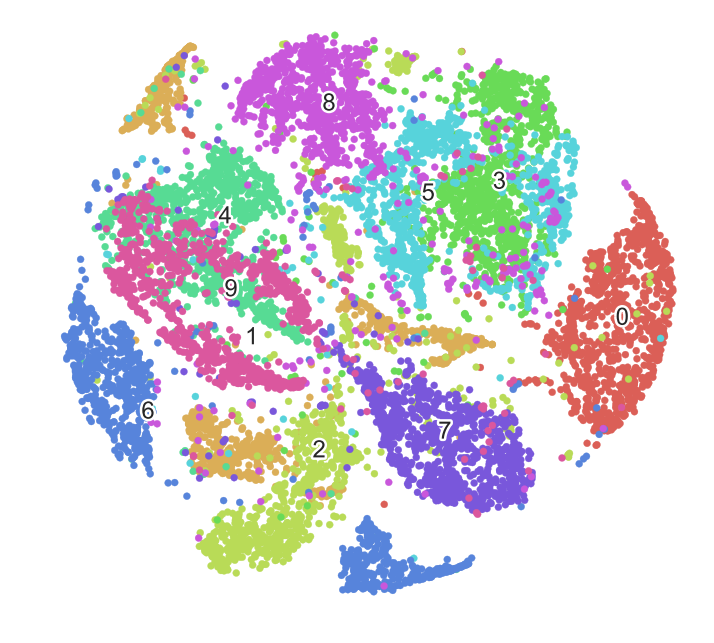

In [7]:
scatter(1000)

### Mô hình Feed Forward sử dụng thư viện TensorFlow

** Mục đích: đối chiếu độ chính xác so với mô hình không sử dụng thư viện **

In [8]:
def feedforward_with_tensorflow(LEARNING_RATE=0.15,
                                LAMBDA=0.001,
                                NUM_EPOCHES=10,
                                BATCH_SIZE=64,
                                NUM_NEURONS=625,
                                NUM_EPOCHES_PRINT=10):
    
    # Khai báo kích thước image vector và label vector
    X = tf.placeholder(tf.float32, [None, IMAGE_PIXELS])
    Y = tf.placeholder(tf.float32, [None, NUM_CLASSES])

    # Khai báo bộ trọng số W và bias của hidden layer và output layer
    Wh = tf.Variable(tf.random_normal([IMAGE_PIXELS, NUM_NEURONS]))
    Bh = tf.Variable(tf.ones([NUM_NEURONS]))
    Wo = tf.Variable(tf.random_normal([NUM_NEURONS, NUM_CLASSES]))
    Bo = tf.Variable(tf.ones([NUM_CLASSES]))

    # Truyền giá trị của các neurons trong lớp ẩn qua hàm phi tuyến sigmoid
    Ah = tf.nn.sigmoid(tf.add(tf.matmul(X, Wh), Bh))
    # Do lớp output sử dụng softmax nên không truyền qua hàm sigmoid
    Y_pred = tf.add(tf.matmul(Ah, Wo), Bo)

    # Khai báo hàm loss là hàm softmax cross entropy dùng để tính khoảng cách giữa hai phân bố xác suất + softmax
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=Y_pred, labels=Y))

    # Sử dụng L2 Regularization để hạn chế overfitting
    regularizer = (tf.nn.l2_loss(Wh) + tf.nn.l2_loss(Wo)) / BATCH_SIZE
    loss += LAMBDA * regularizer
    
    learning_rate = tf.placeholder(tf.float32, [])

    # Khai báo sử dụng phương pháp Gradient Descent để cực tiểu hàm loss
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(
        loss)

    # Khởi tạo Graph session trong TensorFlow
    sess = tf.InteractiveSession()

    # Khởi tạo các biến trong Graph
    tf.global_variables_initializer().run()

    # Lặp qua từng epoch để tính gradient
    for epoch in range(NUM_EPOCHES):
        avg_loss = 0.
        num_batches = mnist.train.num_examples // BATCH_SIZE
        for i in range(num_batches):
            batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)

            _, l = sess.run(
                [train_step, loss],
                feed_dict={
                    learning_rate: LEARNING_RATE / (epoch + 1),
                    X: batch_xs,
                    Y: batch_ys
                })

            avg_loss += l / num_batches

        if (epoch % NUM_EPOCHES_PRINT) == 0:
            print('Epoch: %d - Average loss: %f' % (epoch + 1, avg_loss))

    # Tính độ chính xác của mô hình
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_pred, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
    sess.close()
    
    print('Accuracy: %f' % result)
    
    return result

### Mô hình Feed Forward không sử dụng thư viện

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))


# Hàm softmax cải tiến hạn chế tràn số khi z quá lớn (trừ z cho 1 giá trị c nào đó)
# Bài Softmax Regression của anh Vũ Hữu Tiệp (http://machinelearningcoban.com)
def softmax(z):
    ez = np.exp(z - np.max(z, axis = 1, keepdims = True))
    prob = ez / ez.sum(axis = 1, keepdims=True)
    return prob


def feedforward(LEARNING_RATE=0.15,
                LAMBDA=0.001,
                NUM_EPOCHES=10,
                BATCH_SIZE=64,
                NUM_NEURONS=625,
                NUM_EPOCHES_PRINT=10):

    # Khai báo bộ trọng số W và bias của hidden layer và output layer
    Wh = np.random.uniform(size=(IMAGE_PIXELS, NUM_NEURONS))
    Wo = np.random.uniform(size=(NUM_NEURONS, NUM_CLASSES))
    Bh = np.ones((1, NUM_NEURONS))
    Bo = np.ones((1, NUM_CLASSES))
    
    for epoch in range(NUM_EPOCHES):
        avg_loss = 0.
        
        # Tính tỉ lệ học theo epoch
        learning_rate = LEARNING_RATE / (epoch + 1)
        
        num_batches = mnist.train.num_examples // BATCH_SIZE
        for i in range(num_batches):
            batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
            
            # Bước forward propagation
            Zh = batch_xs.dot(Wh) + Bh
            Ah = sigmoid(Zh)
            
            Zo = Ah.dot(Wo) + Bo
            Ao = softmax(Zo)
            
            # Sử dụng cross-entropy để tính khoảng cách giữa hai phân bố xác suất
            l = -np.sum(batch_ys * np.log(Ao))
            # Sử dụng regularization để tránh overfitting
            l += LAMBDA / 2 * (np.sum(np.square(Wh)) + np.sum(np.square(Wo)))
            l /= BATCH_SIZE
            
            # Bước back propagation
            # Tính độ lệch giữa vector output layer và vector nhãn của ảnh
            Do = (Ao - batch_ys) / BATCH_SIZE
            dWo = (Ah.T).dot(Do)
            dBo = np.sum(Do, axis=0, keepdims=True)
            
            # Tính độ lệch giữa hidden layer và output layer
            Dh = Do.dot(Wo.T) * sigmoid_prime(Ah)
            dWh = (batch_xs.T).dot(Dh)
            dBh = np.sum(Dh, axis=0, keepdims=True)
            
            # Chỉ cộng regularization cho trọng số W (không tính cho bias)
            dWo += LAMBDA * Wo
            dWh += LAMBDA * Wh
            
            # Cập nhật bộ trọng theo gradient
            Wh -= learning_rate * dWh
            Bh -= learning_rate * dBh
            Wo -= learning_rate * dWo
            Bo -= learning_rate * dBo
            
            avg_loss += l / num_batches

        if (epoch % NUM_EPOCHES_PRINT) == 0:
            print('Epoch: %d - Average loss: %f' % (epoch + 1, avg_loss))
    
    # Tính độ chính xác của mô hình bằng Forward propagation
    Zh = mnist.test.images.dot(Wh) + Bh
    Ah = sigmoid(Zh)
    Zo = Ah.dot(Wo) + Bo
    Y_pred = softmax(Zo)
    
    accuracy = np.mean(Y_pred.argmax(axis=1) == mnist.test.labels.argmax(axis=1))
    
    print('Accuracy: %f' % accuracy)
    
    return accuracy

## Thực nghiệm

Trong phần thực nghiệm, sinh viên sẽ thử nghiệm các trường hợp sau đồng thời cho cả 2 mô hình đã cài đặt ở trên để so sánh độ chính xác:

|LEARNING_RATE|LAMBDA|NUM_EPOCHES|BATCH_SIZE|NUM_NEURONS|
|:-:|:-:|:-:|:-:|:-:|
|0.15|0.001|10|64|625|
|0.15|0.001|20|64|625|
|0.5|0.001|10|64|800|
|0.5|0.001|50|64|800|

In [10]:
feedforward_results = []
feedforward_with_tensorflow_results = []

In [13]:
feedforward_with_tensorflow_results.append(feedforward_with_tensorflow(NUM_EPOCHES_PRINT=2))
feedforward_results.append(feedforward(NUM_EPOCHES_PRINT=2))

Epoch: 1 - Average loss: 5.733133
Epoch: 3 - Average loss: 4.472768
Epoch: 5 - Average loss: 4.358702
Epoch: 7 - Average loss: 4.299139
Epoch: 9 - Average loss: 4.268391
Accuracy: 0.898700
Epoch: 1 - Average loss: 22.836301
Epoch: 3 - Average loss: 1.201772
Epoch: 5 - Average loss: 1.027614
Epoch: 7 - Average loss: 0.943028
Epoch: 9 - Average loss: 0.894241
Accuracy: 0.904300


In [14]:
feedforward_with_tensorflow_results.append(feedforward_with_tensorflow(NUM_EPOCHES=20, NUM_EPOCHES_PRINT=4))
feedforward_results.append(feedforward(NUM_EPOCHES=20, NUM_EPOCHES_PRINT=4))

Epoch: 1 - Average loss: 5.837894
Epoch: 5 - Average loss: 4.385269
Epoch: 9 - Average loss: 4.289245
Epoch: 13 - Average loss: 4.251442
Epoch: 17 - Average loss: 4.216650
Accuracy: 0.905100
Epoch: 1 - Average loss: 23.072023
Epoch: 5 - Average loss: 1.029469
Epoch: 9 - Average loss: 0.897793
Epoch: 13 - Average loss: 0.833909
Epoch: 17 - Average loss: 0.791854
Accuracy: 0.911500


In [18]:
feedforward_with_tensorflow_results.append(feedforward_with_tensorflow(LEARNING_RATE=0.5, NUM_NEURONS=800, NUM_EPOCHES_PRINT=4))
feedforward_results.append(feedforward(LEARNING_RATE=0.5, NUM_NEURONS=800, NUM_EPOCHES_PRINT=4))

Epoch: 1 - Average loss: 6.658557
Epoch: 5 - Average loss: 5.031435
Epoch: 9 - Average loss: 4.926095
Accuracy: 0.929600
Epoch: 1 - Average loss: 14.171780
Epoch: 5 - Average loss: 0.492756
Epoch: 9 - Average loss: 0.399266
Accuracy: 0.928600


Kế đến, sinh viên thực nghiệm với nhiều bộ tham số khác nhau để xem hiệu suất của mô hình như thế nào. Để quá trình học diễn ra nhanh hơn, sinh viên tận dụng sức mạnh GPU bằng cách sử dụng mô hình cài trên TensorFlow.

|LEARNING_RATE|LAMBDA|NUM_EPOCHES|BATCH_SIZE|NUM_NEURONS|ACCURACY
|:-:|:-:|:-:|:-:|:-:|:-:|
|1.0|0.01|20|64|400|0.9585|
|1.0|0.01|50|64|400|0.9601|
|1.0|0.01|100|64|500|0.9621|
|2.0|0.01|100|64|500|0.9739|
|3.0|0.01|100|64|550|**0.9769**|
|0.5|0.01|20|64|400|0.9390|
|0.5|0.01|20|64|600|0.9370|
|0.5|0.01|40|64|600|0.9445|
|0.5|0.01|20|128|600|0.9202|
|0.5|0.01|40|128|600|0.9200|
|0.5|0.01|20|64|800|0.9384|
|0.5|0.01|40|64|800|0.9416|
|0.5|0.01|20|128|800|0.9212|
|0.5|0.01|40|128|800|0.9278|

In [22]:
feedforward_with_tensorflow(LEARNING_RATE=1.0, LAMBDA=0.01, NUM_EPOCHES=20, BATCH_SIZE=64, NUM_NEURONS=400, NUM_EPOCHES_PRINT=4)
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=20, BATCH_SIZE=64, NUM_NEURONS=400, NUM_EPOCHES_PRINT=4)

Epoch: 1 - Average loss: 23.049793
Epoch: 5 - Average loss: 13.950059
Epoch: 9 - Average loss: 11.895309
Epoch: 13 - Average loss: 10.776033
Epoch: 17 - Average loss: 10.029618
Accuracy: 0.958500
Epoch: 1 - Average loss: 24.332415
Epoch: 5 - Average loss: 18.677975
Epoch: 9 - Average loss: 17.225992
Epoch: 13 - Average loss: 16.382763
Epoch: 17 - Average loss: 15.796552
Accuracy: 0.939000


0.93900019

In [23]:
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=20, BATCH_SIZE=64, NUM_NEURONS=600, NUM_EPOCHES_PRINT=4)
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=40, BATCH_SIZE=64, NUM_NEURONS=600, NUM_EPOCHES_PRINT=4)

Epoch: 1 - Average loss: 36.161183
Epoch: 5 - Average loss: 27.878658
Epoch: 9 - Average loss: 25.713919
Epoch: 13 - Average loss: 24.453136
Epoch: 17 - Average loss: 23.584093
Accuracy: 0.937000
Epoch: 1 - Average loss: 36.248804
Epoch: 5 - Average loss: 27.908719
Epoch: 9 - Average loss: 25.739823
Epoch: 13 - Average loss: 24.483678
Epoch: 17 - Average loss: 23.611274
Epoch: 21 - Average loss: 22.944699
Epoch: 25 - Average loss: 22.410386
Epoch: 29 - Average loss: 21.964016
Epoch: 33 - Average loss: 21.584062
Epoch: 37 - Average loss: 21.253948
Accuracy: 0.944500


0.94450009

In [24]:
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=20, BATCH_SIZE=128, NUM_NEURONS=600, NUM_EPOCHES_PRINT=4)
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=40, BATCH_SIZE=128, NUM_NEURONS=600, NUM_EPOCHES_PRINT=4)

Epoch: 1 - Average loss: 19.946977
Epoch: 5 - Average loss: 17.608501
Epoch: 9 - Average loss: 17.179343
Epoch: 13 - Average loss: 16.937792
Epoch: 17 - Average loss: 16.775750
Accuracy: 0.920200
Epoch: 1 - Average loss: 20.068426
Epoch: 5 - Average loss: 17.631086
Epoch: 9 - Average loss: 17.217984
Epoch: 13 - Average loss: 16.985737
Epoch: 17 - Average loss: 16.808207
Epoch: 21 - Average loss: 16.672276
Epoch: 25 - Average loss: 16.576691
Epoch: 29 - Average loss: 16.475185
Epoch: 33 - Average loss: 16.404270
Epoch: 37 - Average loss: 16.335321
Accuracy: 0.920000


0.92000014

In [25]:
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=20, BATCH_SIZE=64, NUM_NEURONS=800, NUM_EPOCHES_PRINT=4)
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=40, BATCH_SIZE=64, NUM_NEURONS=800, NUM_EPOCHES_PRINT=4)

Epoch: 1 - Average loss: 48.039401
Epoch: 5 - Average loss: 37.168772
Epoch: 9 - Average loss: 34.284427
Epoch: 13 - Average loss: 32.614205
Epoch: 17 - Average loss: 31.451374
Accuracy: 0.938400
Epoch: 1 - Average loss: 48.013211
Epoch: 5 - Average loss: 37.160576
Epoch: 9 - Average loss: 34.277036
Epoch: 13 - Average loss: 32.610763
Epoch: 17 - Average loss: 31.445442
Epoch: 21 - Average loss: 30.561536
Epoch: 25 - Average loss: 29.852211
Epoch: 29 - Average loss: 29.257510
Epoch: 33 - Average loss: 28.753817
Epoch: 37 - Average loss: 28.314952
Accuracy: 0.941600


0.94160014

In [26]:
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=20, BATCH_SIZE=128, NUM_NEURONS=800, NUM_EPOCHES_PRINT=4)
feedforward_with_tensorflow(LEARNING_RATE=0.5, LAMBDA=0.01, NUM_EPOCHES=40, BATCH_SIZE=128, NUM_NEURONS=800, NUM_EPOCHES_PRINT=4)

Epoch: 1 - Average loss: 26.625632
Epoch: 5 - Average loss: 23.450617
Epoch: 9 - Average loss: 22.909392
Epoch: 13 - Average loss: 22.597806
Epoch: 17 - Average loss: 22.367268
Accuracy: 0.921200
Epoch: 1 - Average loss: 26.555677
Epoch: 5 - Average loss: 23.470779
Epoch: 9 - Average loss: 22.914464
Epoch: 13 - Average loss: 22.595118
Epoch: 17 - Average loss: 22.367696
Epoch: 21 - Average loss: 22.203324
Epoch: 25 - Average loss: 22.059744
Epoch: 29 - Average loss: 21.947261
Epoch: 33 - Average loss: 21.835217
Epoch: 37 - Average loss: 21.749720
Accuracy: 0.927800


0.92780012

In [27]:
feedforward_with_tensorflow(LEARNING_RATE=1.0, LAMBDA=0.01, NUM_EPOCHES=50, BATCH_SIZE=64, NUM_NEURONS=400, NUM_EPOCHES_PRINT=10)

Epoch: 1 - Average loss: 23.049733
Epoch: 11 - Average loss: 11.233494
Epoch: 21 - Average loss: 9.447878
Epoch: 31 - Average loss: 8.515215
Epoch: 41 - Average loss: 7.904023
Accuracy: 0.960100


0.96010011

In [30]:
feedforward_with_tensorflow(LEARNING_RATE=1.0, LAMBDA=0.01, NUM_EPOCHES=100, BATCH_SIZE=64, NUM_NEURONS=500, NUM_EPOCHES_PRINT=10)

Epoch: 1 - Average loss: 28.717483
Epoch: 11 - Average loss: 14.089439
Epoch: 21 - Average loss: 11.847388
Epoch: 31 - Average loss: 10.675469
Epoch: 41 - Average loss: 9.906309
Epoch: 51 - Average loss: 9.346998
Epoch: 61 - Average loss: 8.911313
Epoch: 71 - Average loss: 8.559655
Epoch: 81 - Average loss: 8.264686
Epoch: 91 - Average loss: 8.012046
Accuracy: 0.962100


0.96210015

In [31]:
feedforward_with_tensorflow(LEARNING_RATE=2.0, LAMBDA=0.01, NUM_EPOCHES=100, BATCH_SIZE=64, NUM_NEURONS=500, NUM_EPOCHES_PRINT=10)

Epoch: 1 - Average loss: 25.615703
Epoch: 11 - Average loss: 6.396810
Epoch: 21 - Average loss: 4.548270
Epoch: 31 - Average loss: 3.709843
Epoch: 41 - Average loss: 3.209321
Epoch: 51 - Average loss: 2.865803
Epoch: 61 - Average loss: 2.615832
Epoch: 71 - Average loss: 2.419148
Epoch: 81 - Average loss: 2.262549
Epoch: 91 - Average loss: 2.133598
Accuracy: 0.973900


0.9739002

In [33]:
feedforward_with_tensorflow(LEARNING_RATE=3.0, LAMBDA=0.01, NUM_EPOCHES=100, BATCH_SIZE=64, NUM_NEURONS=550, NUM_EPOCHES_PRINT=10)

Epoch: 1 - Average loss: 25.097899
Epoch: 11 - Average loss: 3.234936
Epoch: 21 - Average loss: 1.969772
Epoch: 31 - Average loss: 1.472135
Epoch: 41 - Average loss: 1.203759
Epoch: 51 - Average loss: 1.031020
Epoch: 61 - Average loss: 0.910705
Epoch: 71 - Average loss: 0.821828
Epoch: 81 - Average loss: 0.753909
Epoch: 91 - Average loss: 0.699175
Accuracy: 0.976900


0.9769001

## Nhận xét

1. Độ chính xác của 2 mô hình xấp xỉ nhau, điều đó cho thấy mô hình không sử dụng thư viện được cài đặt và hoạt động chính xác.

1. Hàm loss của mô hình tự cài đặt có thể khác 1 chút so với hàm loss của Tensorflow mặc dù cùng là cross-entropy loss. Điều này có thể nằm ở việc nhóm sử dụng hàm softmax cải tiến (trừ đi một hằng số c nào đó để tránh overflow). Bên cạnh đó, giá trị Average Loss còn phụ thuộc vào ma trận trọng số khởi tạo ban đầu, phân bố xác suất của hàm khởi tạo, tỉ lệ học,...

1. Do sử dụng chiến lược Mini-batch Gradient Descent với learning rate động nên nhìn chung hàm số không gặp khó khăn khi hội tụ. Có thể nhận thấy được bằng cách quan sát giá trị Average loss giảm dần theo số epoch, không có trường hợp bị ziczac hoặc không hội tụ.

1. Có thể tăng số lượng neurons trong lớp ẩn lên để mô hình có khả năng tổng quát hóa cao hơn. Nhưng lúc đó đòi hỏi một lượng lớn dữ liệu huấn luyện để hạn chế bị overfitting.

1. Tuy chiến lược Mini-batch Gradient Descent nhìn có vẻ không tốt bằng Batch Gradient Descent do số điểm dữ liệu nhỏ hơn rất nhiều nhưng thực tế cho thấy chiến lược Mini-batch Gradient Descent vẫn có khả năng xấp xỉ tốt. Bởi vì trong thống kê, vẫn có thể dùng một mẫu nhỏ để xấp xỉ cho mẫu lớn nhưng cần phải chọn kích thước mẫu hợp lí và đảm bảo tính ngẫu nhiên của nó.

## Tài liệu tham khảo

1. http://yann.lecun.com/exdb/mnist/

1. https://www.tensorflow.org/get_started/get_started

1. http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/

1. http://machinelearningcoban.com/2017/02/17/softmax/#-softmax-regression-cho-mnist

1. http://machinelearningcoban.com/2017/02/24/mlp/#-tinh-toan-backpropagation